In [1]:
from flax import nnx
import numpy as np

# layer = nnx.Linear(1, 1, rngs=nnx.Rngs(0))
class Module(nnx.Module):
    def __init__(self) -> None:
        super().__init__()
        self. layer = nnx.Linear(1, 1, rngs=nnx.Rngs(0))
    def __call__(self, x):
        return self.layer(x)

layer = Module()

x = np.random.randn(100)
x_ = x.reshape((-1,1))
y = 3*x+2

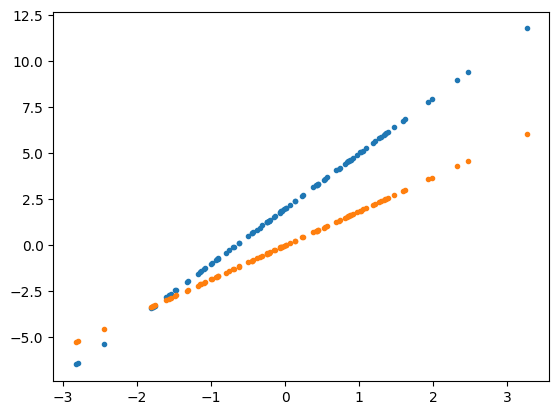

In [2]:
# %matplotlib widget
# %matplotlib tk

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.cla()
ax.plot(x, y, '.')
ax.plot(x, layer(x.reshape((-1, 1))).flatten(), '.')

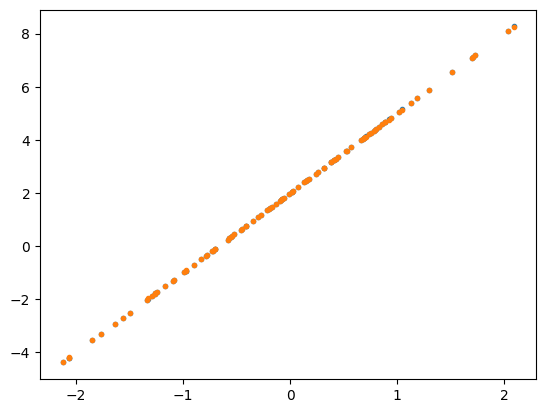

In [8]:
from IPython.display import clear_output
import optax
import time

plt.ioff()
x = np.random.randn(100)
x_ = x.reshape((-1,1))
y = 3*x+2

layer = Module()
optim = nnx.Optimizer(layer, optax.sgd(0.1))
def sse(module, x, y):
    return np.mean((module(x).flatten()-y)**2)
grad_fn = nnx.grad(sse)

try:
    print("Starting loop")
    while True:
        y_ = layer(x_)
        grad = grad_fn(layer, x_, y)
        optim.update(grads=grad)
        clear_output(True)
        plt.clf()
        plt.plot(x, y, '.')
        plt.plot(x, layer(x.reshape((-1, 1))).flatten(), '.')
        # time.sleep(0.1)
        plt.pause(0.1)
        
        # break
except KeyboardInterrupt:
    pass 
        